### Lab 4.2: Analyzing Customer Satisfaction Levels Across Service Industries



#### **Objective:**
Develop and test null and alternative hypotheses to examine customer satisfaction differences across sectors.



#### **Equipment Required:**
- Jupyter Notebook
- Python (Pandas, NumPy, Seaborn, Matplotlib, SciPy)



#### **Prerequisites:**
- Basic knowledge of Python
- Familiarity with data analysis and visualization
- Understanding of hypothesis testing



#### **Problem Statement:**
Analyze customer satisfaction levels across different service factors (delivery experience, food quality, and delivery speed) and test whether order accuracy significantly affects customer satisfaction.


In [16]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [17]:

#Load Dataset
df = pd.read_csv("customer-satisfaction.csv")


In [18]:

# Display the first few rows of the data
df.head()


,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [19]:

# Rename columns for easier access
df.columns = [
    'Customer',
    'Delivery_Satisfaction',
    'Food_Quality',
    'Delivery_Speed',
    'Order_Accuracy'
]

# Clean missing values
df.dropna(inplace=True)


In [20]:

# Convert categorical data to numerical values
df['Order_Accuracy'] = df['Order_Accuracy'].map({'Yes': 1, 'No': 0})


In [21]:

# Summary statistics
print(df.describe())


          Customer  Delivery_Satisfaction  Food_Quality  Delivery_Speed  \
count   9297.00000            9297.000000   9297.000000     9297.000000   
mean    5332.15747               3.321609      3.335054        3.322792   
std     3112.18162               1.423554      1.413883        1.407286   
min        1.00000               1.000000      1.000000        1.000000   
25%     2719.00000               2.000000      2.000000        2.000000   
50%     5256.00000               3.000000      3.000000        3.000000   
75%     8145.00000               5.000000      5.000000        5.000000   
max    10616.00000               5.000000      5.000000        5.000000   

       Order_Accuracy  
count     9297.000000  
mean         0.714962  
std          0.451457  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [22]:

# Hypothesis Testing:
# H0: Order accuracy does not impact delivery satisfaction
# H1: Order accuracy impacts delivery satisfaction

satisfied = df[df['Order_Accuracy'] == 1]['Delivery_Satisfaction']
not_satisfied = df[df['Order_Accuracy'] == 0]['Delivery_Satisfaction']

# Perform t-test
t_stat, p_value = ttest_ind(satisfied, not_satisfied)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 1.311528555003685, P-value: 0.18971164699833581


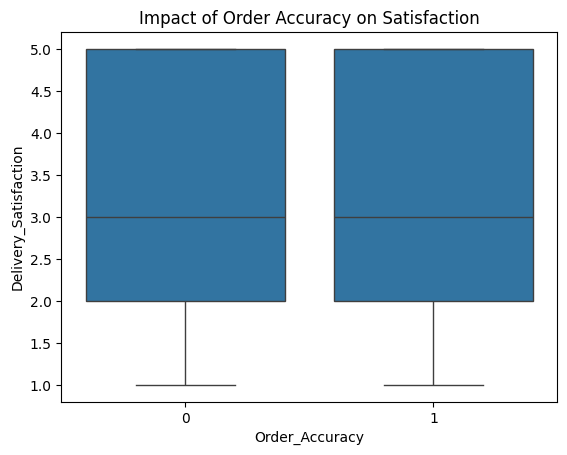

In [23]:

# Visualization
sns.boxplot(x='Order_Accuracy', y='Delivery_Satisfaction', data=df)
plt.title('Impact of Order Accuracy on Satisfaction')
plt.show()




#### **Conclusion:**
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that order accuracy significantly impacts customer satisfaction.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no significant relationship between order accuracy and customer satisfaction.
